In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import linear_model

In [2]:
dataset_dir = 'Dataset_Final/Dataset_unido.csv' #Se carga el dataset
df = pd.read_csv(dataset_dir, sep=(',')) #Se lee el archivo csv el cual está separado por comas
df #Se imprime el dataset

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero,Incidencia
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,1.842103,0.000024
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,1.842103,0.000825
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,1.842103,0.026520
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,1.842103,0.033072
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,1.842103,0.024737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,2.994585,0.014034
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,2.994585,0.005350
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,2.994585,0.061390
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,2.994585,0.006413


La correlacion del dataframe es: 
                       CodDepartamento           Ano  Trimestre  \
CodDepartamento           1.000000e+00 -2.976779e-18   0.000000   
Ano                      -2.976779e-18  1.000000e+00   0.000000   
Trimestre                 0.000000e+00  0.000000e+00   1.000000   
PorcentajeDesempleo       8.169607e-02 -3.902343e-01  -0.135475   
Temperatura               1.009003e-01 -9.328458e-02  -0.184481   
Precipitacion            -2.951208e-02  3.689262e-02   0.127605   
PIB                      -2.620028e-01  2.096711e-02   0.000000   
retail_and_recreation     4.203230e-02  5.903276e-01   0.298218   
grocery_and_pharmacy     -9.277230e-02  6.779377e-01   0.382025   
parks                    -7.504929e-02  4.954936e-01   0.254297   
transit_stations         -3.827684e-02  4.543638e-01   0.186010   
workplaces               -5.258210e-03  5.516437e-01   0.225749   
residential              -8.968919e-02 -4.841843e-01  -0.077886   
PorcentajeVacunacion      1.

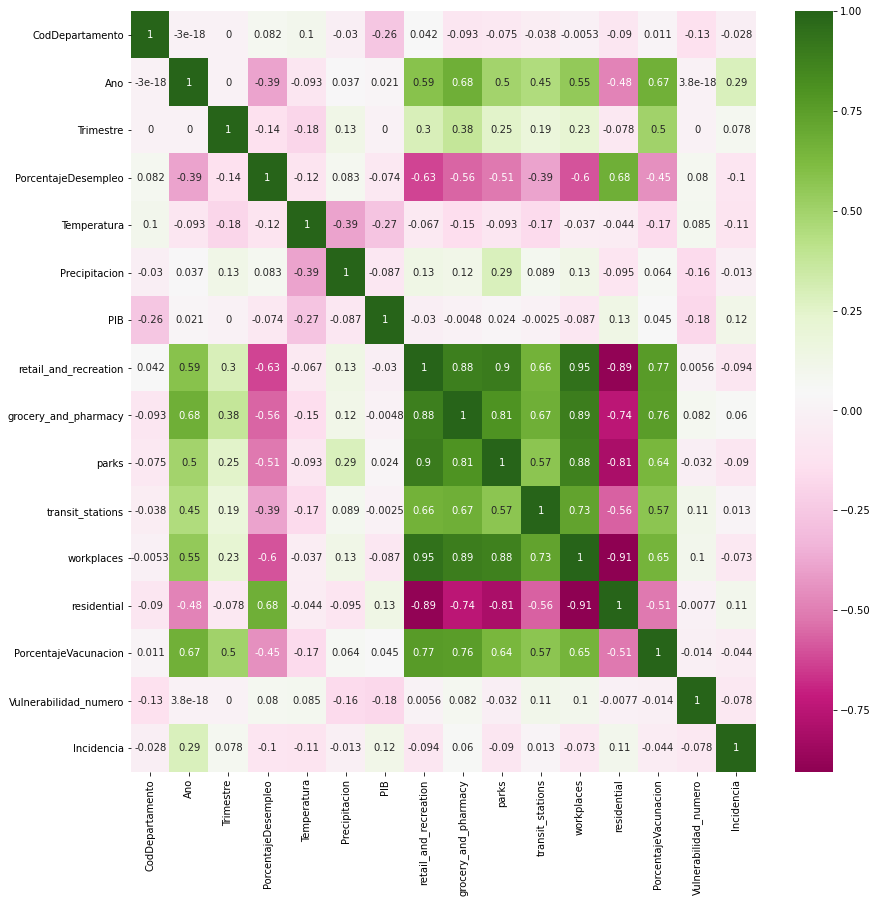

In [3]:
corr_df = df.corr(method="pearson")
print("La correlacion del dataframe es: ")
print(corr_df,"\n")
plt.figure(figsize=(14, 14))
sns.heatmap(corr_df,cmap = 'PiYG', annot=True)
plt.show()

La correlacion del dataframe es: 
                       CodDepartamento       Ano  Trimestre  \
CodDepartamento               1.000000  0.000000   0.000000   
Ano                           0.000000  1.000000   0.000000   
Trimestre                     0.000000  0.000000   1.000000   
PorcentajeDesempleo           0.091138 -0.365949  -0.139743   
Temperatura                   0.163243 -0.098294  -0.145827   
Precipitacion                 0.071478  0.029508   0.149869   
PIB                          -0.208560  0.078200   0.000000   
retail_and_recreation         0.054763  0.560443   0.242905   
grocery_and_pharmacy         -0.059989  0.713428   0.369653   
parks                        -0.039491  0.471171   0.224162   
transit_stations             -0.055066  0.438482   0.153942   
workplaces                    0.012041  0.533756   0.204326   
residential                  -0.099629 -0.437717  -0.047741   
PorcentajeVacunacion         -0.001727  0.925829   0.255542   
Vulnerabilidad_numero

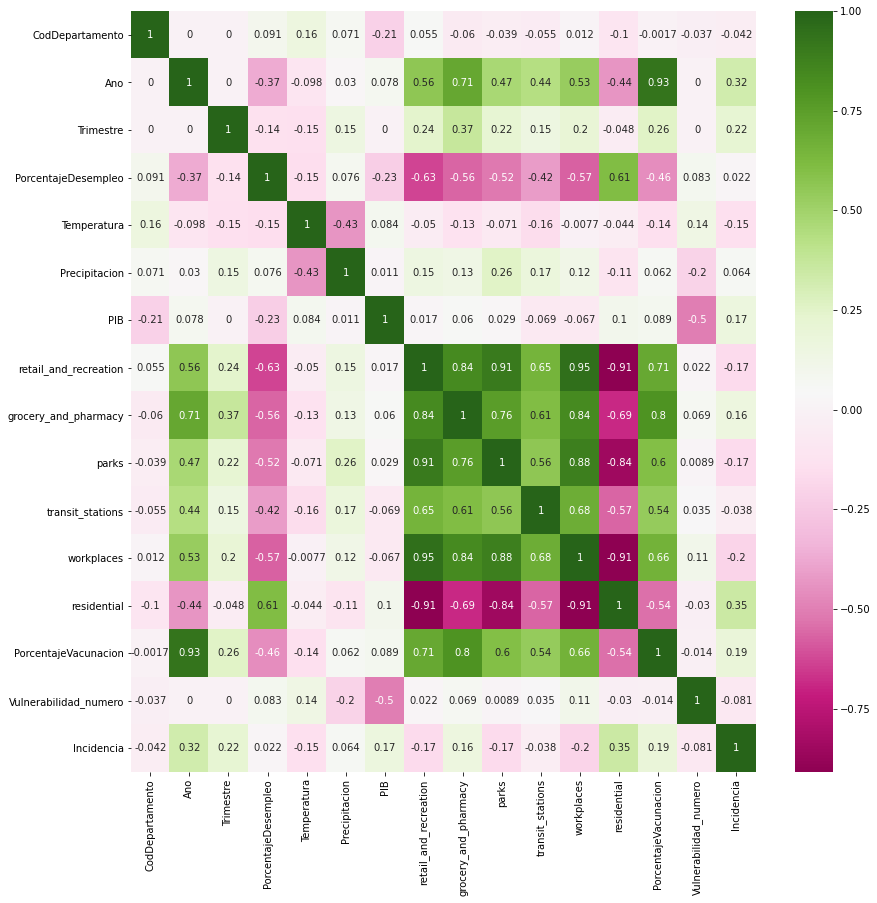

In [4]:
corr_df = df.corr(method="spearman")
print("La correlacion del dataframe es: ")
print(corr_df,"\n")
plt.figure(figsize=(14, 14))
sns.heatmap(corr_df, cmap = 'PiYG', annot=True)
plt.show()

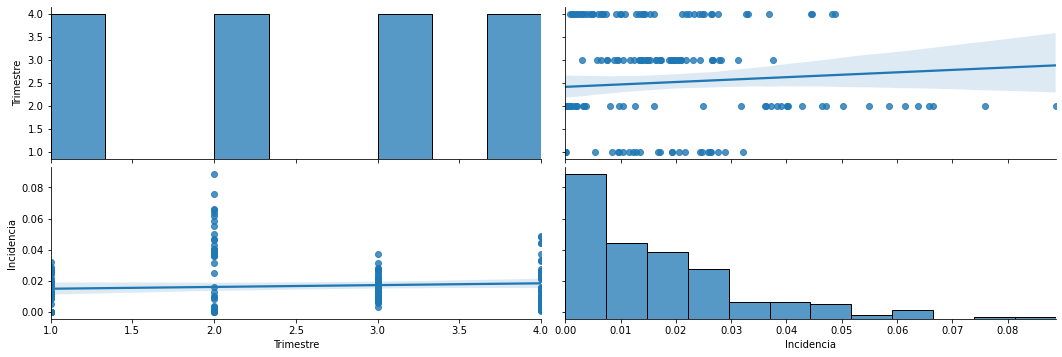

In [5]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(df_dataset_c, x_vars=["CASA","CASA","APTO","TIP_CUARTO","VIV_TRAD_INDIG","1-DOR","1-FALL","2-PER","Fall_Mujer","Per_edad_20 a 24","Indigena","Lee_y_Escribe"], y_vars='Vulnerabilidad_numero', size=20, aspect=1, kind='reg')
sns.pairplot(df, vars=["Trimestre",'Incidencia'],size=2.5, aspect=3, kind='reg')
plt.show()

In [6]:
y = df["Incidencia"]
X = df.iloc[:,:-1]
X

,CodDepartamento,Ano,Trimestre,PorcentajeDesempleo,Temperatura,Precipitacion,PIB,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,PorcentajeVacunacion,Vulnerabilidad_numero
0,5,2020,1,12.9,24.149651,7.957837,46018.0,-12.489606,-8.493907,-11.392832,-9.280287,-5.809319,4.227240,0.00,1.842103
1,5,2020,2,25.2,22.286968,5.173339,46018.0,-67.037634,-44.896057,-55.349462,-62.886022,-50.243011,25.524731,0.00,1.842103
2,5,2020,3,20.0,22.739094,7.672982,46018.0,-50.040860,-28.913620,-39.594624,-51.555556,-34.839427,17.956272,0.00,1.842103
3,5,2020,4,15.2,23.157370,8.176094,46018.0,-28.945878,-3.579928,-27.370968,-28.567742,-19.315054,10.191756,0.00,1.842103
4,5,2021,1,17.9,22.285123,6.276447,52347.0,-32.214670,-0.670507,-31.100230,-34.711982,-20.892857,9.510369,0.66,1.842103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,88,2020,4,25.3,25.658387,0.000000,1027.0,-57.937993,-29.239427,-60.999642,-41.625090,-32.145878,13.854480,0.00,2.994585
188,88,2021,1,16.0,26.667411,0.000000,1300.0,-36.820661,-11.887865,-48.219662,-15.671659,-21.868280,9.530722,0.51,2.994585
189,88,2021,2,16.0,28.111204,0.000000,1300.0,-23.432616,-3.455914,-47.115412,-0.963082,-16.767384,11.880645,13.53,2.994585
190,88,2021,3,11.9,23.849370,0.000000,1300.0,1.812545,11.936918,-38.234050,31.749821,-7.212903,6.475986,56.77,2.994585


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
modelo =  LinearRegression()
modelo.fit(X_train, Y_train)
y_pred = modelo.predict(X_test)

resultado = modelo.score(X_test, Y_test)
# compute the RMSE of our predictions
print("RMSE: ",(np.sqrt(mean_squared_error(Y_test, y_pred))))
print(std(y_pred)) # con esto vamos a ver cual es la precisión de nuestro modelo en porcentaje.
print("R2: ",r2_score(Y_test,y_pred))

RMSE:  0.014347642070231502
0.010809127319976995
R2:  0.29138572557040454


In [8]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=2, n_repeats=5, random_state=1)
modelo = LinearRegression()

kfold_validacion = KFold(n_splits=2, random_state=1, shuffle=True) # Acá indicamos cuantos fold queremos. En nuestro caso elegimos 10.and

In [9]:
scores = cross_val_score(modelo, X_train, Y_train, cv = cv, n_jobs=-1)
print(scores)
print(Y_test)
rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = scores,
        squared = False
       )

print('Accuracy: %.3f %.3f (%.3f) %.3f' % (std(scores), mean(scores), std(scores), r2_score(Y_test,y_pred))) # para ver el promedio de los resultados 

[-0.90610981  0.15002587  0.28171023 -0.23424381  0.14568892  0.12547205
  0.15633474  0.03433844 -0.08672332  0.39264436]
11     0.015987
142    0.014867
34     0.011793
169    0.000484
1      0.000825
69     0.050153
152    0.000013
188    0.005350
48     0.000000
178    0.019057
182    0.020842
168    0.000017
101    0.042759
61     0.024846
93     0.038239
189    0.061390
82     0.010526
181    0.036146
71     0.005914
179    0.023201
89     0.000458
83     0.004739
154    0.023027
33     0.000619
88     0.000058
110    0.015026
6      0.019432
14     0.013446
121    0.001717
180    0.021682
18     0.031259
153    0.000250
175    0.002075
135    0.009872
165    0.058592
99     0.012847
111    0.010176
102    0.002969
120    0.000005
26     0.014786
80     0.000000
190    0.006413
113    0.002107
105    0.001951
45     0.063856
47     0.003040
77     0.040025
12     0.032106
191    0.025156
108    0.027595
84     0.009774
16     0.000049
19     0.027673
2      0.026520
140    0.0257

ValueError: Found input variables with inconsistent numbers of samples: [58, 10]

# Regresion Lineal Multiple

In [10]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(X_train, Y_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(X_test)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(Y_test, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(Y_test, z_pred))

Coefficients: 
 [ 4.36923651e-05  2.78573420e-02  7.81946544e-03 -1.15084422e-03
 -7.30963540e-04 -2.95831917e-04 -5.99145490e-11 -2.72967244e-04
 -5.91229251e-05  2.38327925e-04  1.04236932e-04  5.72391035e-05
  8.95423832e-04 -7.43775709e-04 -1.06709515e-03]
Mean squared error: 0.00
Variance score: 0.29


# Arbol de decisiones

In [29]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "Incidencia"),
                                        df['Incidencia'],
                                        random_state = 123,
                                        train_size=0.8
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 7,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=123)

Profundidad del árbol: 7
Número de nodos terminales: 75


True

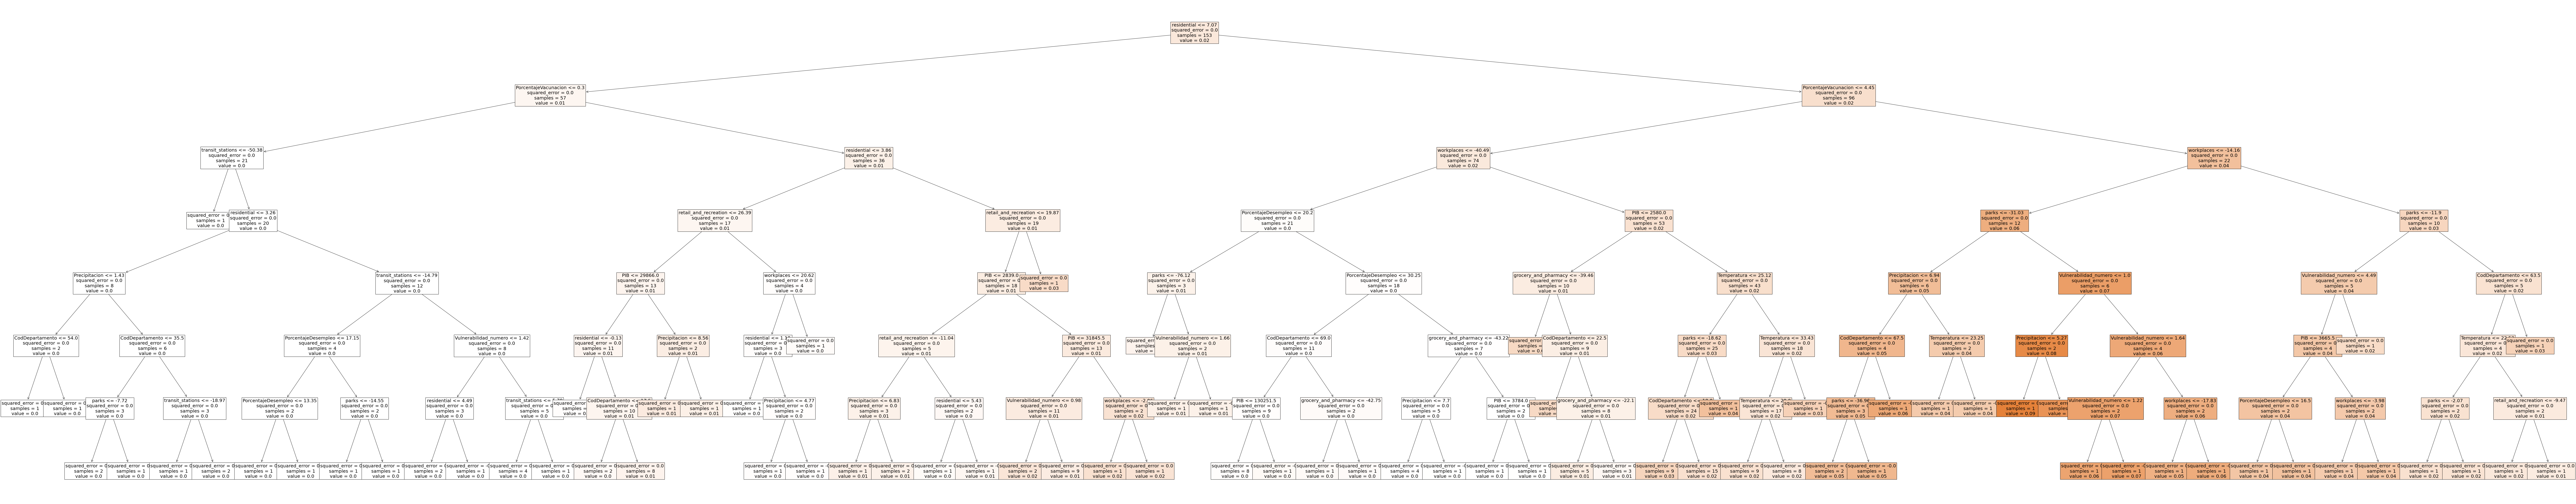

In [46]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(200, 40))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = df.drop(columns = "Incidencia").columns,
            class_names   = 'Incidencia',
            filled        = True,
            impurity      = True,
            fontsize      = 20,
            precision     = 2,
            ax            = ax
       )
dot_data = export_graphviz(modelo,
                           feature_names=df.drop(columns = "Incidencia").columns)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

In [41]:
conda install pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sebas\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd3eb1b0_1          23 KB
    ------------------------------------------------------------
                                           Total:          23 KB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/noarch::pydotplus-2.0.2-pyhd3eb1b0_1




pydotplus-2.0.2      | 23 KB     |            |   0% 
pydotplus-2.0.2      | 23 KB     | ######8    |  68% 
pydotplus-2.0.2      | 23 KB     | ########## | 100% 
pydotplus-2.0.2      | 23 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to 



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 22.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [42]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [43]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sebas\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    h63a05c6_1001         5.2 MB  conda-forge
    conda-22.9.0               |   py38haa244fe_2         982 KB  conda-forge
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h8d14728_0          63 KB  conda-forge
    getopt-win32-0.1           |       h8ffe710_0          19 KB  conda-forge
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h69fa6b1_0         186 KB  conda-forge
    harfbuzz-4.3.0             |       hda2c7e1_0   



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 22.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




  pcre               conda-forge/win-64::pcre-8.45-h0e60522_0
  pixman             conda-forge/win-64::pixman-0.38.0-hfa6e2cd_1003
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-22.9.0-py38haa244fe_2
  pydotplus          pkgs/main::pydotplus-2.0.2-pyhd3eb1b0~ --> conda-forge::pydotplus-2.0.2-pyhaef67bd_5




fribidi-1.0.10       | 63 KB     |            |   0% 
fribidi-1.0.10       | 63 KB     | ##5        |  25% 
fribidi-1.0.10       | 63 KB     | ########## | 100% 
fribidi-1.0.10       | 63 KB     | ########## | 100% 

pixman-0.38.0        | 993 KB    |            |   0% 
pixman-0.38.0        | 993 KB    | 1          |   2% 
pixman-0.38.0        | 993 KB    | ####       |  40% 
pixman-0.38.0        | 993 KB    | #########8 |  98% 
pixman-0.38.0        | 993 KB    | ########## | 100% 

cairo-1.16.0         | 5.2 MB    |            |   0% 
cairo-1

In [35]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(df.drop(columns = "Vulnerabilidad_numero").columns)
               )
print(texto_modelo)

|--- residential <= 7.07
|   |--- PorcentajeVacunacion <= 0.30
|   |   |--- transit_stations <= -50.38
|   |   |   |--- value: [0.00]
|   |   |--- transit_stations >  -50.38
|   |   |   |--- residential <= 3.26
|   |   |   |   |--- Precipitacion <= 1.43
|   |   |   |   |   |--- CodDepartamento <= 54.00
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- CodDepartamento >  54.00
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- Precipitacion >  1.43
|   |   |   |   |   |--- CodDepartamento <= 35.50
|   |   |   |   |   |   |--- parks <= -7.72
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- parks >  -7.72
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- CodDepartamento >  35.50
|   |   |   |   |   |   |--- transit_stations <= -18.97
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- transit_stations >  -18.97
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |--- residential 

In [32]:
importancia_predictores = pd.DataFrame(
                            {'variable': df.drop(columns = "Incidencia").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,variable,importancia
13,PorcentajeVacunacion,0.365197
11,workplaces,0.232871
12,residential,0.227667
9,parks,0.059426
6,PIB,0.024573
0,CodDepartamento,0.022421
14,Vulnerabilidad_numero,0.021446
4,Temperatura,0.018643
5,Precipitacion,0.009038
8,grocery_and_pharmacy,0.007154


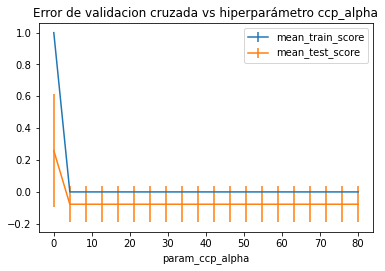

In [33]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 1234
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [16]:
grid.best_params_

{'ccp_alpha': 0.0}

Profundidad del árbol: 13
Número de nodos terminales: 152


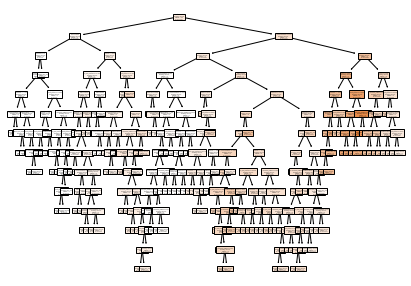

In [17]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df.drop(columns = "Incidencia").columns,
            class_names   = 'Incidencia',
            filled        = True,
            impurity      = True,
            ax            = ax
       )

In [18]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)
resultado = modelo.score(X_test, y_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

Std:  0.011496417677385915
El error (rmse) de test es:  0.10222865091365674
R2:  0.5838317127465288


In [25]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

Std:  0.012642848411576313
El error (rmse) de test es:  0.09949679556767767
R2:  0.6265651538836341


In [26]:
dd = pd.DataFrame()
dd['Valor'] = y_test
dd['Predicho'] = predicciones
dd

,Valor,Predicho
172,0.024407,0.023201
26,0.014786,0.009731
41,0.000273,0.001193
4,0.024737,0.026167
85,0.040171,0.031742
142,0.014867,0.007564
62,0.020607,0.015026
146,0.016435,0.016368
53,0.012629,0.009609
88,0.000058,0.000049


In [27]:
predicciones = modelo.predict(X = X_test)
resultado = modelo.score(X_test, y_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))
print("Score: ", resultado)
# Los coeficientes
#print('Coefficients: \n', modelo.coef_)

Std:  0.011496417677385915
El error (rmse) de test es:  0.10222865091365674
R2:  0.5838317127465288
Score:  0.5838317127465288


In [28]:
dd = pd.DataFrame()
dd['Valor'] = y_test
dd['Predicho'] = predicciones
dd

,Valor,Predicho
172,0.024407,0.024498
26,0.014786,0.009731
41,0.000273,0.001469
4,0.024737,0.024498
85,0.040171,0.031742
142,0.014867,0.007347
62,0.020607,0.014015
146,0.016435,0.024498
53,0.012629,0.009967
88,0.000058,0.000044


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)


# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=15).fit(X_train, y_train)
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle=True)
cv_results = model_selection.cross_val_score(knn_model, X_train, y_train, cv=kfold, scoring=scoring)
results.append(cv_results)

msg = "SVR: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)
# Score
score_knn = knn_model.score(X_test, y_test)
score_knn

In [ ]:
from sklearn.svm import SVR

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)


# Instance and fit
knn_model = SVR().fit(X_train, y_train)
#kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle=True)
#cv_results = model_selection.cross_val_score(knn_model, X_train, y_train, cv=kfold, scoring=scoring)
#results.append(cv_results)

#msg = "SVR: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)
print(results)
# Score
score_knn = knn_model.score(X_test, y_test)
score_knn

In [ ]:
#Se escalan todos los datos
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)

escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

algoritmo = GaussianNB()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)

In [ ]:
# Make predictions on validation dataset
LDA = LinearDiscriminantAnalysis(solver = 'svd',n_components=2)
#LDA = QuadraticDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predictions))

# Prueba DANE

In [ ]:
dataset = df.loc[:,['CodDepartamento','Ano','Trimestre','Vulnerabilidad_numero','Incidencia']]
dataset

In [ ]:
y = dataset["Incidencia"]
X = dataset.iloc[:,:-1]
X

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(X_train, Y_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(X_test)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(Y_test, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(Y_test, z_pred))

In [ ]:
dl = pd.DataFrame()
dl['Valor'] = y_test
dl['Predicho'] = z_pred
dl

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.8, random_state = 4)
modelo =  LinearRegression()
modelo.fit(X_train, Y_train)
y_pred = modelo.predict(X_test)
resultado = modelo.score(X_test, Y_test)
# compute the RMSE of our predictions
print("RMSE: ",(np.sqrt(mean_squared_error(Y_test, y_pred))))
print(std(y_pred)) # con esto vamos a ver cual es la precisión de nuestro modelo en porcentaje.
print("R2: ",r2_score(Y_test,y_pred))

# Arbol de decisiones

In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        dataset.drop(columns = "Incidencia"),
                                        dataset['Incidencia'],
                                        random_state = 123,
                                        train_size=0.8
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 7,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(70, 20))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = dataset.drop(columns = "Incidencia").columns,
            class_names   = 'Incidencia',
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(dataset.drop(columns = "Vulnerabilidad_numero").columns)
               )
print(texto_modelo)

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'variable': dataset.drop(columns = "Incidencia").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

In [ ]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
grid.best_params_

In [ ]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df.drop(columns = "Vulnerabilidad_numero").columns,
            class_names   = 'Vulnerabilidad_numero',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [ ]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)
resultado = modelo.score(X_test, y_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))

In [ ]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("Std: ",std(predicciones))
print(f"El error (rmse) de test es: ", np.sqrt(rmse))
print("R2: ",r2_score(y_test,predicciones))